In [1]:
%load_ext autoreload
%autoreload 2

In [143]:
import math
import time
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import sys
sys.path.append('../src')
from preprocessing import *
from plotting import *
from utils import *

In [3]:
df_db = group_datafiles_byID('../datasets/raw/HT_Sensor_metadata.dat', '../datasets/raw/HT_Sensor_dataset.dat')
df_db = reclassify_series_samples(df_db)

# Testing sklearn DecisionTree Classifier

In [4]:
df_train, df_test = split_series_byID(100, 0.75, df_db)

In [5]:
features = ['R1', 'R2', 'R3', 'R4', 'R5', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity']
xtrain, ytrain = df_train[features].values, df_train['class'].values
xtest, ytest = df_test[features].values, df_test['class'].values
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(701805, 11)
(701805,)
(227186, 11)
(227186,)


In [6]:
clf_tree = DecisionTreeClassifier(
                criterion='entropy',
                splitter='best',
                max_features='sqrt',
                random_state=0)
            # Default input args:
            #    max_depth=None -> If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
            #    min_samples_split=2
            #    min_samples_leaf=1
            #    ccp_alpha=0.0 -> By default, no pruning is performed

In [7]:
start_t = time.time()

clf_tree.fit(xtrain, ytrain)

end_t = time.time()
print('Training time (mins):', (end_t-start_t)/60)


Training time (mins): 0.07512848774592082


In [8]:
clf_tree.score(xtest, ytest)

0.7461287227205902

In [11]:
print(clf_tree.tree_.max_depth)

180


# Testing RandomForest (ensembles)

## Using whole dataset

In [7]:
df_db = group_datafiles_byID('../datasets/raw/HT_Sensor_metadata.dat', '../datasets/raw/HT_Sensor_dataset.dat')
df_db = reclassify_series_samples(df_db)

In [12]:
max_depth_list = [2, 4, 6, 8, 10, 14, 18, 22, 26, 32, 36, 40]
n_estimators_list = [400, 500, 700, 1000]
criterions = ['entropy', 'gini']

In [13]:
main_start = time.time()

for d in max_depth_list:
    for nest in n_estimators_list:
        for crit in criterions:

            df_train, df_test = split_series_byID(100, 0.77, df_db)
            features = ['R1', 'R2', 'R3', 'R4', 'R5', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity']
            xtrain, ytrain = df_train[features].values, df_train['class'].values
            xtest, ytest = df_test[features].values, df_test['class'].values
            
            clf_randFor = RandomForestClassifier(
                        n_estimators=nest,
                        criterion=crit,
                        max_depth=d,
                        max_features='sqrt',
                        random_state=0)

            start_t = time.time()

            clf_randFor.fit(xtrain, ytrain)

            end_t = time.time()
            print('==========================================')
            print('Number of estimators:',nest)
            print('Max depth:', d)
            print('Criterion:', crit)
            print('Training time (mins):', (end_t-start_t)/60)
            print('Precision (score):', clf_randFor.score(xtest, ytest))
            print('==========================================')

main_end = time.time()

print('==================================================')
print('OVERALL TIME (hours):', (main_end-main_start)/(60*60))
print('==================================================')
print('==================================================')

        

9139
Number of estimators: 1000
Max depth: 2
Criterion: gini
Training time (mins): 6.274376936753591
Precision (score): 0.82572384867891
Number of estimators: 400
Max depth: 4
Criterion: entropy
Training time (mins): 5.355758766333262
Precision (score): 0.8250252487058514
Number of estimators: 400
Max depth: 4
Criterion: gini
Training time (mins): 4.3957205533981325
Precision (score): 0.8006146586511463
Number of estimators: 500
Max depth: 4
Criterion: entropy
Training time (mins): 6.587088612715403
Precision (score): 0.830885825237377
Number of estimators: 500
Max depth: 4
Criterion: gini
Training time (mins): 5.570846013228098
Precision (score): 0.8388239826545058
Number of estimators: 700
Max depth: 4
Criterion: entropy
Training time (mins): 9.296311287085215
Precision (score): 0.7938500736418873
Number of estimators: 700
Max depth: 4
Criterion: gini
Training time (mins): 8.30868130127589
Precision (score): 0.8073012898149703
Number of estimators: 1000
Max depth: 4
Criterion: entrop

In [14]:
df_train, df_test = split_series_byID(100, 0.77, df_db)
features = ['R1', 'R2', 'R3', 'R4', 'R5', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity']
xtrain, ytrain = df_train[features].values, df_train['class'].values
xtest, ytest = df_test[features].values, df_test['class'].values

clf_randFor = RandomForestClassifier(
            n_estimators=5000,
            criterion='entropy',
            max_depth=7,
            max_features='sqrt',
            random_state=0)

start_t = time.time()

clf_randFor.fit(xtrain, ytrain)

end_t = time.time()
print('==========================================')
print('Number of estimators:',5000)
print('Max depth:', 7)
print('Criterion:', 'entropy')
print('Training time (mins):', (end_t-start_t)/60)
print('Precision (score):', clf_randFor.score(xtest, ytest))
print('==========================================')

Number of estimators: 5000
Max depth: 7
Criterion: entropy
Training time (mins): 132.90388695001602
Precision (score): 0.8471366322797279


# Boosting with AdaBoost classifier

In [9]:
df_db = group_datafiles_byID('../datasets/preprocessed/HT_Sensor_prep_metadata.dat',
                             '../datasets/preprocessed/HT_Sensor_prep_dataset.dat')
df_db = reclassify_series_samples(df_db)

In [10]:
base_estim = DecisionTreeClassifier(max_depth=5)

In [11]:
features = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity']

store_data = []

main_start = time.time()

for i in range(10):
    df_train, df_test = split_series_byID(100, 0.8, df_db)
    xtrain, ytrain = df_train[features].values, df_train['class'].values
    xtest, ytest = df_test[features].values, df_test['class'].values

    clf_boost = AdaBoostClassifier(base_estimator=base_estim, n_estimators=500, learning_rate=0.1)

    start_t = time.time()

    clf_boost.fit(xtrain, ytrain)

    end_t = time.time()
    print('>===============================================================<')
    print('Training time (mins):', (end_t-start_t)/60)
    y_pred = clf_boost.predict(xtest)
    metric_report(ytest, y_pred)
    print('>===============================================================<')
    test_ids = list(set(df_test['id']))
    data = [i, clf_boost, test_ids]
    store_data.append(data)
                
main_end = time.time()
print('==============================================================')
print('Total time (hours):', (main_end-main_start)/(60*60))
print('==============================================================')

>===============================================================<
Training time (mins): 60.569030567010245
TEST SET PROPORTIONS:
	Real background percentage: 0.789080459770115
	Real banana percentage: 0.11267651888341544
	Real wine percentage: 0.09824302134646962
------------------------------------------
Accuracy: 0.8548440065681445
Recall on background: 0.9833732181874935
Recall on banana: 0.0003886136209074128
Recall on wine: 0.8024959607777592
F1-score: 0.8047925002083012
>===============================================================<
>===============================================================<
Training time (mins): 59.598216251532236
TEST SET PROPORTIONS:
	Real background percentage: 0.7201993506803027
	Real banana percentage: 0.17016307139868547
	Real wine percentage: 0.1096375779210118
------------------------------------------
Accuracy: 0.6832262609036454
Recall on background: 0.8862725487744791
Recall on banana: 0.06987456814715677
Recall on wine: 0.3013864064537945
F1-

In [60]:
main_data = [store_data[0], store_data[6]]
main_data

[[0,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                     learning_rate=0.1, n_estimators=500),
  [3,
   4,
   15,
   25,
   29,
   34,
   36,
   39,
   43,
   47,
   55,
   65,
   70,
   73,
   74,
   76,
   87,
   89,
   92,
   94]],
 [6,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                     learning_rate=0.1, n_estimators=500),
  [2,
   4,
   14,
   19,
   25,
   27,
   29,
   31,
   42,
   47,
   52,
   64,
   67,
   69,
   72,
   74,
   76,
   79,
   80,
   82]]]

In [61]:
with open('../models/best_adaBoost.pkl', 'wb') as f:
    pickle.dump(main_data, f)

In [62]:
with open('../models/best_adaBoost.pkl', 'rb') as f:
    res = pickle.load(f)

print(res)

[[0, AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=500), [3, 4, 15, 25, 29, 34, 36, 39, 43, 47, 55, 65, 70, 73, 74, 76, 87, 89, 92, 94]], [6, AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=500), [2, 4, 14, 19, 25, 27, 29, 31, 42, 47, 52, 64, 67, 69, 72, 74, 76, 79, 80, 82]]]


# Random Forest with windows

In [4]:
win_df = pd.read_pickle('../datasets/preprocessed/window120_dataset.pkl')

In [5]:
features = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity',
            'R1_mean', 'R2_mean', 'R3_mean', 'R4_mean', 'R5_mean', 'R6_mean', 'R7_mean',
            'R8_mean', 'Temp._mean', 'Humidity_mean', 'R1_std', 'R2_std', 'R3_std', 'R4_std',
            'R5_std', 'R6_std', 'R7_std', 'R8_std', 'Temp._std', 'Humidity_std']

store_data = []

main_start = time.time()

for i in range(10):
    df_train, df_test = split_series_byID(100, 0.8, win_df)
    xtrain, ytrain = df_train[features].values, df_train['class'].values
    xtest, ytest = df_test[features].values, df_test['class'].values

    clf_rf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=7)

    start_t = time.time()
    clf_rf.fit(xtrain, ytrain)
    end_t = time.time()

    sc = clf_rf.score(xtest, ytest)
    if sc > 0.85:
        print('>===============================================================<')
        print('Training time (mins):', (end_t-start_t)/60)
        y_pred = clf_rf.predict(xtest)
        metric_report(ytest, y_pred)
        print('>===============================================================<')
        test_ids = list(set(df_test['id']))
        data = [i, clf_rf, test_ids]
        store_data.append(data)
    else:
        print('>===============================================================<')
        print(sc)
        print('>===============================================================<')
                
main_end = time.time()
print('==============================================================')
print('Total time (hours):', (main_end-main_start)/(60*60))
print('==============================================================')

>===============================================================<
Training time (mins): 22.713820616404217
TEST SET PROPORTIONS:
	Real background percentage: 0.7698813088573536
	Real banana percentage: 0.10432669357288547
	Real wine percentage: 0.1257919975697609
------------------------------------------
Accuracy: 0.8702371652996571
Recall on background: 0.9735701753767888
Recall on banana: 0.06036813643926789
Recall on wine: 0.9094829444995473
F1-score: 0.8339762656277273
>===============================================================<
>===============================================================<
Training time (mins): 24.740298982461294
TEST SET PROPORTIONS:
	Real background percentage: 0.8015699016314148
	Real banana percentage: 0.10330541579260054
	Real wine percentage: 0.09512468257598461
------------------------------------------
Accuracy: 0.8653806722291446
Recall on background: 0.9561658391326306
Recall on banana: 0.09186218128149015
Recall on wine: 0.9404189465539159
F1-s

# Excluding some IDs (final test)

In [48]:
win_df = pd.read_pickle('../datasets/preprocessed/window120_dataset.pkl')

In [6]:
excl_ids = [3,30,39,2,24,49,87,93]
win_df = get_df_excluding_ID_list(win_df, excl_ids)

In [8]:
len(set(win_df['id']))

91

In [17]:
features = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity',
            'R1_mean', 'R2_mean', 'R3_mean', 'R4_mean', 'R5_mean', 'R6_mean', 'R7_mean',
            'R8_mean', 'Temp._mean', 'Humidity_mean', 'R1_std', 'R2_std', 'R3_std', 'R4_std',
            'R5_std', 'R6_std', 'R7_std', 'R8_std', 'Temp._std', 'Humidity_std']

store_data = []

main_start = time.time()

for i in range(30):
    df_train, df_test = split_series_byID(100, 0.8, win_df)
    xtrain, ytrain = df_train[features].values, df_train['class'].values
    xtest, ytest = df_test[features].values, df_test['class'].values

    clf_rf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=7)

    start_t = time.time()
    clf_rf.fit(xtrain, ytrain)
    end_t = time.time()

    sc = clf_rf.score(xtest, ytest)
    if sc > 0.85:
        print('>===============================================================<')
        print('[',i,'] Training time (mins):', (end_t-start_t)/60)
        y_pred = clf_rf.predict(xtest)
        metric_report(ytest, y_pred)
        print('>===============================================================<')
        test_ids = list(set(df_test['id']))
        data = [i, clf_rf, test_ids]
        store_data.append(data)
    else:
        print('>===============================================================<')
        print(sc)
        print('>===============================================================<')
                
main_end = time.time()
print('==============================================================')
print('Total time (hours):', (main_end-main_start)/(60*60))
print('==============================================================')

>===============================================================<
[ 0 ] Training time (mins): 19.634682647387187
TEST SET PROPORTIONS:
	Real background percentage: 0.8173751866408087
	Real banana percentage: 0.11110920418075411
	Real wine percentage: 0.07151560917843719
------------------------------------------
Accuracy: 0.8704126406599505
Recall on background: 0.9800039194277635
Recall on banana: 0.10354237462671198
Recall on wine: 0.8092952563794896
F1-score: 0.8342831840391749
>===============================================================<
>===============================================================<
[ 1 ] Training time (mins): 22.70389409859975
TEST SET PROPORTIONS:
	Real background percentage: 0.7727863327029705
	Real banana percentage: 0.03945557227946946
	Real wine percentage: 0.1877580950175601
------------------------------------------
Accuracy: 0.8944463741268187
Recall on background: 0.9897787617985384
Recall on banana: 0.019400065210303227
Recall on wine: 0.685954093

In [54]:
with open('../models/random_forest_win120.pkl', 'rb') as f:
    data_res = pickle.load(f)

for item in data_res:
    print(item[0], item[1], item[2])

0.9068100358422939 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500) [99, 58, 5, 71, 41, 73, 77, 14, 48, 80, 82, 53, 54, 26, 59]
0.8700898991486707 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500) [0, 7, 8, 15, 21, 25, 31, 34, 36, 38, 57, 66, 76, 81, 86, 88, 94, 97, 98, 99]
0.8886671158096221 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500) [0, 1, 66, 36, 5, 38, 9, 73, 77, 14, 48, 83, 84, 53, 54, 86, 89]
0.8874747588063719 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500) [8, 17, 22, 26, 31, 36, 37, 41, 50, 54, 59, 64, 65, 75, 80, 83, 85, 90, 92]
0.9154535663412431 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500) [97, 98, 99, 58, 37, 5, 6, 38, 73, 42, 11, 46, 81, 54, 86, 88, 26, 92]
0.902370726230728 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500) [32, 33, 99, 42, 13, 78, 47, 92, 61, 85, 88, 89, 59, 28, 29, 31]
0.8992897863310332 Ran

In [130]:
clf_data = data_res[-1]
clf = clf_data[1]
test_ids = clf_data[2]
df_test = get_df_from_ID_list(win_df, test_ids)
xtest, ytest = df_test[features].values, df_test['class'].values

In [131]:
y_pred = clf.predict(xtest)
metric_report(ytest, y_pred)
print('Test ids:', test_ids)

TEST SET PROPORTIONS:
	Real background percentage: 0.7441719833564494
	Real banana percentage: 0.049969486823855755
	Real wine percentage: 0.20585852981969488
------------------------------------------
Accuracy: 0.8832898751733703
Recall on background: 0.9913894003891544
Recall on banana: 0.30609525924281117
Recall on wine: 0.6326200614455884
F1-score: 0.8710946053009225
Test ids: [9, 12, 15, 28, 29, 32, 44, 47, 50, 53, 56, 58, 61, 62, 68, 78, 83, 90, 98]


In [132]:
probs = clf.predict_proba(xtest)

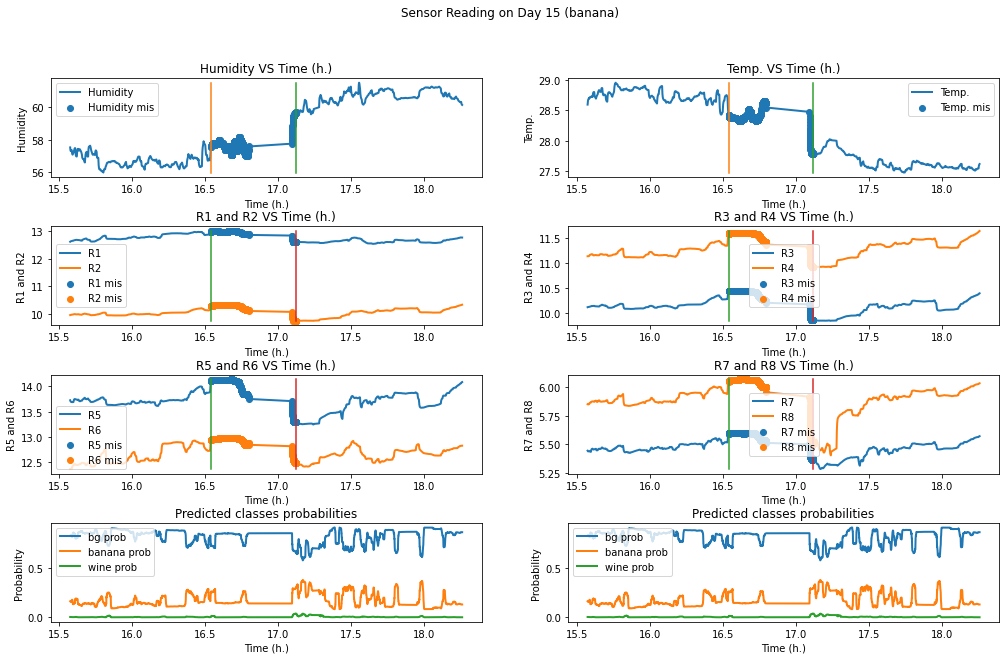

In [153]:
plot_misclassified_byID(df_test, 15, ytest, y_pred, probs_mtx=probs)